In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(1,10,5)
y=np.sin(x)

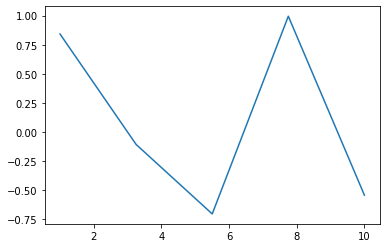

In [3]:
plt.plot(x,y)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [6]:
tran=transforms.ToTensor()

In [7]:
train_data=datasets.MNIST(root='E:\\New folder',train=True,transform=tran)

In [9]:
test_data=datasets.MNIST(root='E:\\New folder',train=False,transform=tran)

In [10]:
train=DataLoader(train_data,shuffle=True,batch_size=10)

In [11]:
test_data=DataLoader(test_data,shuffle=False,batch_size=10)

In [46]:
class Convolution(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(5*5*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=F.max_pool2d(x,2,2)
        x=F.relu(self.conv2(x))
        x=F.max_pool2d(x,2,2)
        x=x.view(-1,5*5*16)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [47]:
model=Convolution()

# Weights of layers before training

In [50]:
model.conv1.weight

Parameter containing:
tensor([[[[ 0.2728,  0.2297, -0.0429],
          [ 0.0357,  0.0836, -0.2315],
          [ 0.2500, -0.1182, -0.0345]]],


        [[[-0.1061, -0.1644, -0.0902],
          [ 0.2895,  0.1384, -0.0169],
          [ 0.0644, -0.0579,  0.2019]]],


        [[[-0.2103,  0.3220,  0.0547],
          [-0.2575,  0.1443,  0.2420],
          [-0.0361, -0.2150,  0.0023]]],


        [[[ 0.2629,  0.1579,  0.0761],
          [ 0.2523, -0.2767,  0.2518],
          [ 0.0303, -0.2641,  0.2156]]],


        [[[ 0.0333, -0.0469, -0.3072],
          [-0.0996,  0.2606,  0.2279],
          [-0.0564,  0.0247, -0.2526]]],


        [[[-0.0400,  0.0486,  0.2845],
          [ 0.3094, -0.2937,  0.1040],
          [ 0.0530, -0.0211,  0.1753]]]], requires_grad=True)

In [52]:
model.conv2.weight

Parameter containing:
tensor([[[[ 0.0783,  0.1264,  0.0878],
          [-0.0845, -0.0670,  0.0896],
          [-0.0467,  0.0616,  0.0246]],

         [[ 0.1107, -0.0640,  0.0588],
          [ 0.0315,  0.0858,  0.0040],
          [-0.0745, -0.0694,  0.0924]],

         [[-0.1138, -0.0768,  0.0004],
          [-0.0899, -0.1321, -0.1030],
          [-0.1057,  0.0299, -0.0426]],

         [[-0.0944, -0.0510, -0.0542],
          [ 0.0019,  0.0240,  0.0361],
          [-0.0758,  0.0434,  0.0993]],

         [[-0.0537,  0.0786,  0.0588],
          [ 0.0476,  0.0897,  0.0418],
          [ 0.0730,  0.1222,  0.0968]],

         [[-0.0485,  0.1202, -0.0630],
          [ 0.0443, -0.0282,  0.0332],
          [-0.1339,  0.1052,  0.0924]]],


        [[[ 0.1259,  0.0630, -0.1218],
          [ 0.1202, -0.0384,  0.0799],
          [ 0.1131, -0.1199,  0.0219]],

         [[ 0.0970, -0.0437,  0.0927],
          [ 0.0320, -0.1156,  0.0515],
          [ 0.0543,  0.0949, -0.0031]],

         [[ 0.0728,  0.0

In [53]:
model.fc1.weight

Parameter containing:
tensor([[-0.0220,  0.0381,  0.0494,  ..., -0.0469, -0.0121,  0.0124],
        [-0.0447, -0.0169, -0.0317,  ...,  0.0137, -0.0022,  0.0244],
        [ 0.0233,  0.0043,  0.0351,  ...,  0.0314,  0.0282, -0.0475],
        ...,
        [-0.0389,  0.0245,  0.0098,  ..., -0.0330,  0.0334,  0.0371],
        [-0.0380, -0.0075, -0.0302,  ..., -0.0116, -0.0491,  0.0337],
        [-0.0467, -0.0174, -0.0180,  ...,  0.0152,  0.0414, -0.0037]],
       requires_grad=True)

In [54]:
model.fc2.weight

Parameter containing:
tensor([[ 0.0572, -0.0342,  0.0509,  ...,  0.0630, -0.0608, -0.0276],
        [-0.0717,  0.0019, -0.0416,  ...,  0.0121,  0.0320, -0.0449],
        [ 0.0572,  0.0541,  0.0278,  ...,  0.0362,  0.0169,  0.0151],
        ...,
        [-0.0528, -0.0871,  0.0770,  ...,  0.0600,  0.0662,  0.0318],
        [-0.0848,  0.0548,  0.0861,  ...,  0.0785, -0.0367, -0.0445],
        [-0.0715, -0.0160, -0.0279,  ..., -0.0621, -0.0543,  0.0764]],
       requires_grad=True)

In [55]:
model.fc3.weight

Parameter containing:
tensor([[-2.9601e-02, -1.0573e-02, -6.7171e-02,  1.3635e-03,  2.4882e-02,
         -5.3616e-02, -3.4257e-02,  1.0378e-04, -5.1051e-02,  8.8720e-02,
          4.1343e-02,  4.3533e-02,  4.3762e-02,  7.4325e-02,  9.7643e-02,
         -7.1670e-02, -5.4621e-02,  2.7236e-02, -9.7863e-02,  1.0329e-02,
         -1.0051e-01,  2.4041e-02,  1.9299e-02,  9.9981e-02,  5.5452e-02,
          3.9774e-03,  1.0197e-01, -2.6777e-02, -6.3808e-02,  4.0119e-02,
         -2.5723e-02,  1.0664e-01,  2.3876e-02,  3.0736e-02, -1.0792e-01,
          9.5313e-02, -2.4092e-02,  5.2882e-02, -5.9265e-02, -1.0633e-01,
         -3.2972e-02, -8.4875e-02, -4.5311e-02, -9.7343e-02,  5.3520e-02,
          1.4511e-02, -1.2332e-02, -1.0617e-01,  5.3877e-02, -8.5139e-02,
         -3.0291e-02, -4.1878e-02,  9.3999e-02, -5.9021e-02,  9.8425e-02,
          8.9228e-02,  2.0045e-02,  7.5419e-02,  9.8708e-02, -4.9117e-02,
          3.0840e-02, -1.1734e-02,  9.8856e-02,  8.1379e-02,  8.5366e-02,
          2.8815

# Model Training

In [26]:
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:

train_losses=[]
for i in range(4):
    train_corr=0
    for b, (x_train,y_train) in enumerate(train):
        b=b+1
        y_pred=model.forward(x_train)
        los=criteria(y_pred,y_train)
        prediction=torch.max(y_pred,1)[1]
        batch_corr=(prediction==y_train).sum()
        train_corr+=batch_corr
        optimizer.zero_grad()
        los.backward()
        optimizer.step()
        if (b%600)==0:
            print(f'Epoch {i} batch: {b} loss: {los.item()} accuracy {(100*train_corr)/(b*10)}')
    train_losses.append(los)

Epoch 0 batch: 600 loss: 0.2925166189670563 accuracy 79.51667022705078
Epoch 0 batch: 1200 loss: 0.18553943932056427 accuracy 86.03333282470703
Epoch 0 batch: 1800 loss: 0.18517254292964935 accuracy 88.97222137451172
Epoch 0 batch: 2400 loss: 0.0627606213092804 accuracy 90.6875
Epoch 0 batch: 3000 loss: 0.05812176316976547 accuracy 91.72333526611328
Epoch 0 batch: 3600 loss: 0.02290249615907669 accuracy 92.53055572509766
Epoch 0 batch: 4200 loss: 0.5246407389640808 accuracy 93.12142944335938
Epoch 0 batch: 4800 loss: 0.004067072179168463 accuracy 93.5875015258789
Epoch 0 batch: 5400 loss: 0.01041803415864706 accuracy 94.00926208496094
Epoch 0 batch: 6000 loss: 0.0004907389520667493 accuracy 94.36333465576172
Epoch 1 batch: 600 loss: 0.05003541707992554 accuracy 97.25
Epoch 1 batch: 1200 loss: 0.001833912916481495 accuracy 97.50833129882812
Epoch 1 batch: 1800 loss: 0.0357016995549202 accuracy 97.65555572509766
Epoch 1 batch: 2400 loss: 0.07298356294631958 accuracy 97.67916870117188
Epo

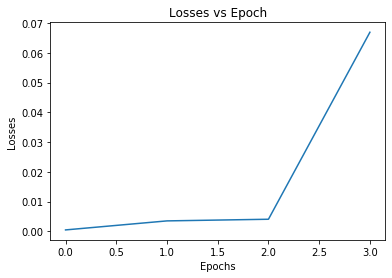

In [48]:
plt.plot(range(4),train_losses)
plt.title('Losses vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.show()

# Model Testing

In [38]:
test_losses=[]
with torch.no_grad():
    correct=0
    for i, (x_test,y_test) in enumerate(test_data):
        i+=1
        y_pred=model.forward(x_test)
        los=criteria(y_pred,y_test)
        prediction=torch.max(y_pred,1)[1]
        test_corr=(prediction==y_test).sum()
        correct+=test_corr
        test_losses.append(los)
print(f'Accuracy {100*correct/(i*10)}')

Accuracy 98.72000122070312


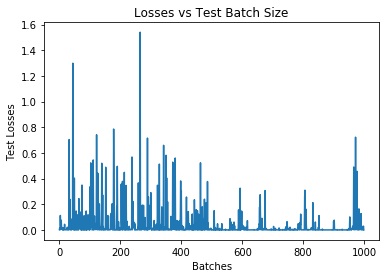

In [49]:
plt.plot(test_losses)
plt.xlabel('Batches')
plt.title('Losses vs Test Batch Size')
plt.ylabel('Test Losses')
plt.show()

# Model Weights of the layer after training

In [39]:
model.conv1.weight

Parameter containing:
tensor([[[[-0.0335,  0.3161,  0.1674],
          [ 0.0744,  0.1612, -0.0454],
          [ 0.2154,  0.4000,  0.2736]]],


        [[[ 0.1212,  0.0924, -0.8937],
          [ 0.3005,  0.4546, -0.0626],
          [ 0.0764,  0.1983,  0.3741]]],


        [[[ 0.2867,  0.2122,  0.3210],
          [ 0.5056,  0.3144,  0.3944],
          [-0.0142, -0.4625, -0.6105]]],


        [[[-0.2146, -0.4305,  0.1429],
          [ 0.2135,  0.4088,  0.2755],
          [ 0.1034,  0.4482, -0.2179]]],


        [[[-0.1759,  0.1625, -0.1583],
          [ 0.0838, -0.3332,  0.2458],
          [ 0.1752, -0.2113, -0.2045]]],


        [[[-0.6161, -0.5843, -0.2690],
          [-0.0756, -0.1825, -0.1481],
          [ 0.3492,  0.5978,  0.2464]]]], requires_grad=True)

In [40]:
model.conv2.weight

Parameter containing:
tensor([[[[-1.1057e-01, -1.3396e-01, -3.0708e-01],
          [-3.2722e-02,  2.0375e-01, -1.8186e-01],
          [-2.0019e-01,  1.6746e-01,  1.6218e-01]],

         [[ 4.2460e-01, -1.3859e-01, -4.6879e-01],
          [ 2.8423e-01,  3.6552e-01, -2.8005e-02],
          [-1.7591e-01,  2.3616e-01,  4.4771e-01]],

         [[-1.5740e-02, -2.7436e-01, -2.6151e-01],
          [ 1.3202e-01,  4.4295e-02, -1.7824e-01],
          [ 1.2098e-01,  1.0782e-01, -4.7127e-02]],

         [[ 2.0716e-01, -5.7917e-02, -3.7159e-01],
          [-3.9128e-03,  1.7919e-02, -5.2596e-02],
          [-5.6015e-02,  7.6429e-02,  2.2392e-01]],

         [[ 3.3805e-02, -7.7287e-02,  1.4299e-01],
          [ 4.9092e-02,  1.2640e-01,  6.4697e-02],
          [-8.0765e-02, -9.1235e-02, -4.5141e-02]],

         [[ 2.4786e-01,  2.8622e-01, -3.0931e-01],
          [-2.9727e-01,  1.4273e-01,  4.2114e-02],
          [-1.4221e-01, -4.4383e-01, -2.2528e-01]]],


        [[[ 1.0360e-01,  1.1149e-01, -4.1540e-

In [41]:
model.fc1.weight

Parameter containing:
tensor([[-4.6375e-02,  4.5340e-03, -4.3182e-02,  ..., -3.2551e-02,
          2.7198e-02,  3.5758e-02],
        [ 2.9625e-02, -1.4008e-02, -8.4823e-02,  ..., -4.1621e-02,
         -8.1483e-03,  2.3164e-02],
        [ 3.7120e-04, -5.1798e-02, -5.7969e-02,  ..., -1.2687e-02,
          9.7947e-02, -2.5585e-02],
        ...,
        [-1.6589e-02, -7.0605e-02,  1.9631e-02,  ...,  1.7504e-01,
         -1.4742e-01,  1.3212e-01],
        [ 7.8719e-02,  4.2336e-02,  2.3340e-02,  ..., -1.5498e-01,
          1.5736e-01,  6.0780e-01],
        [-1.0321e-03,  2.3773e-02, -2.3650e-02,  ..., -4.8085e-03,
         -3.1841e-02,  2.6529e-02]], requires_grad=True)

In [44]:
model.fc2.weight

Parameter containing:
tensor([[-0.0033, -0.0352,  0.0431,  ...,  0.1738,  0.1250, -0.0407],
        [ 0.0134,  0.0803,  0.0411,  ...,  0.1956,  0.1455,  0.0741],
        [ 0.0672,  0.1000,  0.0158,  ...,  0.0657, -0.1374,  0.0841],
        ...,
        [-0.0560,  0.0504, -0.0711,  ..., -0.1376,  0.0887, -0.0338],
        [ 0.0107,  0.0443,  0.0581,  ...,  0.3660, -0.0207, -0.0318],
        [-0.0245, -0.0862,  0.0196,  ...,  0.0644, -0.1005, -0.0248]],
       requires_grad=True)

In [45]:
model.fc3.weight

Parameter containing:
tensor([[ 1.2986e-01,  1.2280e-01, -2.3570e-01, -1.5963e-01, -9.7379e-03,
         -2.5332e-01,  8.9056e-02, -1.2098e-01, -5.9953e-02, -2.4611e-01,
         -1.9447e-01,  1.9531e-01, -4.6471e-01, -4.1480e-02, -2.9869e-01,
         -1.2840e-01, -4.4365e-02, -2.1817e-01,  1.9265e-01,  9.7995e-02,
         -1.0425e-01,  1.4854e-01, -2.7945e-01, -5.6878e-02,  5.0544e-02,
         -4.8850e-02,  2.7252e-02, -1.9900e-01, -1.6121e-01, -2.6812e-01,
         -2.1433e-02, -3.4874e-01, -2.6308e-02,  1.0309e-01,  7.1461e-04,
         -2.1967e-01, -2.1756e-02,  1.4074e-01, -4.3179e-01, -1.9951e-01,
          1.3794e-03, -2.2039e-01, -2.8327e-01, -8.6117e-02,  4.8796e-02,
          1.6358e-02,  5.3699e-02, -2.3210e-01, -2.5659e-04, -4.1868e-01,
          1.6945e-01,  1.5001e-01, -2.2434e-01,  1.7314e-01, -2.9049e-01,
         -3.4741e-01, -2.1945e-01, -3.2714e-01,  1.4965e-01, -2.2733e-01,
         -1.3720e-01, -1.0708e-01, -2.0785e-01, -1.6590e-01, -2.4507e-01,
         -1.7840